Please **submit this Jupyter notebook through Canvas** no later than **Friday December 14, 10:59**, before the start of the lecture.

The final project is in **groups of three**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

A single, jointly written report for each group is fine. All members in a group will receive the same grade.

# Exercise 0

**Jordan Earle** (12297127)

**Natasja Wezel** (11027649)

**Esra** (10001812)

----
# Project keywords
Interpolation, least squares, optimization, nonlinear least squares

----
# Project description
In this assignment,  we will explore methods for data fitting and interpolation. Given a dataset of some quantity at different moments in time, such methods can be used to predict future values as well as to compute values at past times where we do not have observations.

Consider the following data set for Arctic sea ice minimum, an important climate signal. Arctic sea ice extent reaches a minimum every year in September. The data, obtained from NASA (see
https://climate.nasa.gov/vital-signs/arctic-sea-ice/), shows the minimum sea ice extent reached in different years. 
In the table, $t$ denotes the year, $s$ denotes the sea ice extent in million square kilometers.

The aim of this project is to explore various ways of fitting functions to this dataset, and see how well they perform and how robust they are.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

years = np.array([1979, 1982, 1985, 1988, 1991, 1994, 1997, 2000, 2003, 2006, 2009, 2012, 2015, 2016], dtype=np.float64)
ice_areas = np.array([7.00, 7.34, 6.79, 7.47, 6.46, 7.15, 6.85, 6.37, 6.21, 5.97, 5.31, 3.40, 4.59, 4.30], dtype=np.float64)

# these are the points we're asked to predict at some point in the exercises
years_to_predict = np.array([1984, 2016, 2017, 2018], dtype=np.float64)
ice_areas_actual = np.array([6.8, 4.3, 4.6, 4.8], dtype=np.float64)

**NB:** Because of the mentioning of 1984, 2017 and 2018 in exercise 3, and the mentioning of 1984, 2016 and 2017 in 4, we did the predictions for all four of these years each time.

----
# Project exercises
## Exercise 1
Read sections 7.1 - 7.3 from the book by Heath.

$\checkmark$

## Exercise 2
For constructing a polynomial interpolating function through the data, consider the following possible sets of basis functions: (a) the set $\phi_j(t)=t^{j-1}$ (these are the regular monomials), (b) the set $\phi_j(t)=(t-1978)^{j-1}$, (c) the set $\phi_j(t)=((t-1998)/18)^{j-1}$. The index $j$ runs from 1 to $J$.

What should be the value of $J$? For each of the sets of basis functions (a), (b), (c), compute the corresponding Vandermonde matrix. How do their condition numbers compare?

In [38]:
# fill with ones (because the first column is always ones)
phi1 = np.ones((len(years),len(years)))
phi2 = np.ones((len(years),len(years)))
phi3 = np.ones((len(years),len(years)))

# set up Vandermonde matrix for each basis function
for i in range(0, len(years)):
    for j in range(0, len(years)):
        phi1[i][j] = years[i]**j
        phi2[i][j] = (years[i] - 1978)**j 
        phi3[i][j] = ((years[i] - 1998)/18)**j 
        
phi1pd = pd.DataFrame(phi1)
#print(phi1pd)
        
print("Condition number of basis (a) is: ", np.linalg.cond(phi1))
print("Condition number of basis (b) is: ", np.linalg.cond(phi2))
print("Condition number of basis (c) is: ", np.linalg.cond(phi3))

Condition number of basis (a) is:  2.9138298687044305e+56
Condition number of basis (b) is:  8.36070803560451e+20
Condition number of basis (c) is:  225102.97749699058


#### Discussion of exercise 2
The values of J should run from 1 to length(input) where the input is the dates data.

The condition number of basis (c) is much better conditioned than that of condition (a) or (b).  Though (c) is still not very well condtioned, meaning that it will be sensitive towards small changes in the input.

## Exercise 3
Use the set of basis functions with the best conditioning and compute the interpolating function through the data in the table above. Show the coefficients of the interpolating function in a table. Plot the data points and the interpolating function in a single figure. Discuss the results.

What values does this interpolating function predict for $t=1984$? What values for $t=2017$ and $t=2018$? Check the NASA website mentioned in the introduction to see how good these predictions are.

In [39]:
# use same time range everywhere
time_steps = np.linspace(1978, 2020, 100000)

In [57]:
# calculate coefficients for the function
coefficients = np.linalg.solve(phi3, ice_areas)

# TODO: calculate also with the basis set that's less good?

In [41]:
# set up interpolation function
def get_function_value(time_step, c):
    x = ((time_step-1998)/18)
    
    y = c[13] * x**13 + c[12] * x**12 + c[11] * x**11 + c[10] * x**10 + c[9] * x**9 + c[8] * x**8 +\
        c[7] * x**7 + c[6] * x**6 + c[5] * x**5 + c[4] * x**4 + c[3] * x**3 + c[2] * x**2 + c[1] * x + c[0]
    
    return y

Predicted Ice surface in 1984:  5.113976036204813
Predicted Ice surface in 2016:  4.300000000000601
Predicted Ice surface in 2017:  -0.13812550522226275
Predicted Ice surface in 2018:  -12.531946103030599


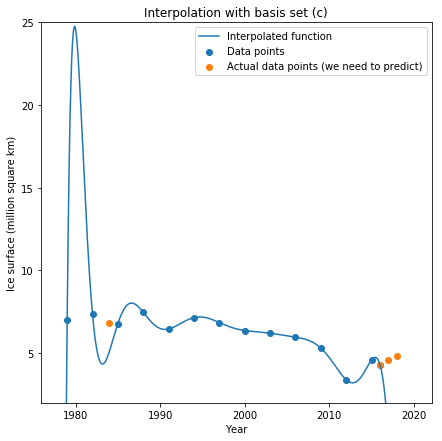

In [59]:
interpolation_ice_area = [get_function_value(time_step, coefficients) for time_step in time_steps]

# Plot it!
plt.figure(figsize=(7,7))
plt.title("Interpolation with basis set (c)")
plt.ylabel("Ice surface (million square km)")
plt.xlabel("Year")

plt.scatter(years, ice_areas, label='Data points')
plt.plot(time_steps, interpolation_ice_area, label='Interpolated function')
plt.scatter(years_to_predict, ice_areas_actual, label="Actual data points (we need to predict)")

plt.ylim(2, 25)
plt.legend()

# predicted points
print("Predicted Ice surface in 1984: ", get_function_value(1984, coefficients))
print("Predicted Ice surface in 2016: ", get_function_value(2016, coefficients))
print("Predicted Ice surface in 2017: ", get_function_value(2017, coefficients))
print("Predicted Ice surface in 2018: ", get_function_value(2018, coefficients))

#### Discussion of exercise 3

The coefficients of the polynomial are given in the following table: 

\begin{array}{|c|c|}
\hline Parameter & \text{Value}\\\hline
  a & 6.64 \\\hline
  b & -3.52 \\\hline
  c & 8.58 \\\hline
  d & 35.31 \\\hline
  e & -194.92 \\\hline
  f & -63.98 \\\hline
  g & 1175.50 \\\hline
  h & -488.08 \\\hline
  i & -2890.30 \\\hline
  j & 1860.00 \\\hline
  k & 3032.21 \\\hline
  l & -2199.94 \\\hline
  m & -1123.27 \\\hline
  n & 850.10 \\\hline
\end{array}

The interpolated function is given in the figure in exercise 3, together with the data points we needed to predict. In the following table, the actual values of the data points and our predictions are given. We can conclude that the predictions for the points that are in the "end" (2017/2018) of our data set are not that good.

\begin{array}{|c|c|c|}
\hline Year & \text{Actual Data} & \text{Interpolation basis (c)}\\\hline
  1984 & 6.8 & 5.114 \\\hline
  2016 & 4.3 & 4.300\\\hline
  2017 & 4.6 & -0.138 \\\hline
  2018 & 4.8 & -12.532 \\\hline
\end{array}

## Exercise 4
How sensitive are the results to small changes in the data? To assess this, add (modest) random perturbations to the $s$ values in the dataset and recompute the interpolating function. Plot the new interpolating function together with the old one, and compare them. Also, use the new function to predict values for $t=1984$, $t=2016$ and $t=2017$, and compare these to the predictions you made before.

Predicted Ice surface in 1984:  5.462598269534516
Predicted Ice surface in 2016:  4.338140836044438
Predicted Ice surface in 2017:  12.379586102892247
Predicted Ice surface in 2018:  64.4840187149662


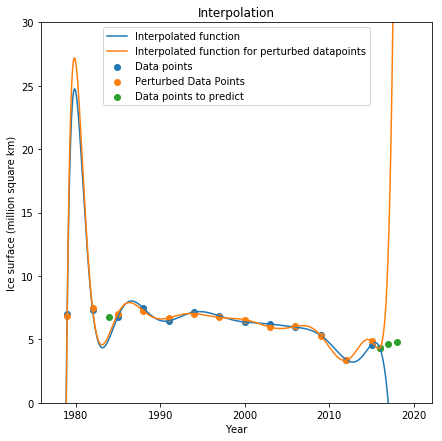

In [71]:
perturbed_ice_areas = []

for data_point in ice_areas:
    noise = np.random.rand()/2 - 0.25

    # add noise between -0.5 and 0.5
    perturbed_data_point = data_point + noise
    perturbed_ice_areas.append(perturbed_data_point)

pert_coefficients = np.linalg.solve(phi3, perturbed_ice_areas)

interpolation_perturbed = [get_function_value(time_step, pert_coefficients) for time_step in time_steps]

plt.figure(figsize=(7,7))
plt.scatter(years, ice_areas, label='Data points')
plt.scatter(years, perturbed_ice_areas, label='Perturbed Data Points')
plt.plot(time_steps, interpolation_ice_area, label='Interpolated function')
plt.plot(time_steps, interpolation_perturbed, label='Interpolated function for perturbed datapoints')

plt.scatter(years_to_predict, ice_areas_actual, label="Data points to predict")
plt.ylim(0, 30)
plt.legend()

plt.title("Interpolation")
plt.ylabel("Ice surface (million square km)")
plt.xlabel("Year")

print("Predicted Ice surface in 1984: ", get_function_value(1984, pert_coefficients))
print("Predicted Ice surface in 2016: ", get_function_value(2016, pert_coefficients))
print("Predicted Ice surface in 2017: ", get_function_value(2017, pert_coefficients))
print("Predicted Ice surface in 2018: ", get_function_value(2018, pert_coefficients))

#### Discussion of exercise 4
Noise between -0.5 and 0.5 is added to the data points. New coefficients are calculated and a new function is plotted. The newly predicted ice areas are given in the table below.

__NB:__ the predicted ice surfaces change if the cell runs again (because the noise is random).

p = perturbed data set

\begin{array}{|c|c|c|c|}
\hline Year & \text{Actual Data} & \text{Interpolation basis (c)} & \text{Interpolation basis (c) - p}\\\hline
  1984 & 6.8 & 5.114 & 5.463 \\\hline
  2016 & 4.3 & 4.300 & 3.338\\\hline
  2017 & 4.6 & -0.138 & 12.380\\\hline
  2018 & 4.8 & -12.532 & 64.484\\\hline
\end{array}

We can see that this way of interpolating is pretty sensitive to small changes in the input data.

## Exercise 5
As an alternative to interpolation, one can use minimization (e.g. linear least squares) to fit a function to the data. Use linear least squares to fit a low-degree (e.g., quadratic or cubic) polynomial to the data in the table. Plot the resulting function together with the data. Make predictions for values at $t=1984$, $t=2017$ and $t=2018$. Compare the results to the results obtained before with interpolation.

Explore the sensitivity of the least squares fit to changes in the data, in the same way as before.

In [95]:
def quadratic_polynomial(coefficients, x):
    return coefficients[0]*x**2 + coefficients[1]*x + coefficients[2]

def cubic_polynomial(coefficients, x):
    return coefficients[0]*x**3 + coefficients[1]*x**2 + coefficients[2]*x + coefficients[3]

# Design the matrices
Qm = np.array([[T**2, T, 1] for T in years])
Cm = np.array([[T**3, T**2, T, 1] for T in years])


In [125]:
# Quadratic function fitting

# Find the parameters (grab zero'th element because these are the coefficients)
qp = np.linalg.lstsq(Qm, ice_areas, rcond=None)[0]
pqp = np.linalg.lstsq(Qm, perturbed_ice_areas, rcond=None)[0]

# Calculate the line with the parameters 
yQ = quadratic_polynomial(qp, time_steps)
pyQ = quadratic_polynomial(pqp, time_steps)

In [126]:
# Cubic function fitting

# Find the parameters
cp = np.linalg.lstsq(Cm, ice_areas, rcond=None)[0]
pcp = np.linalg.lstsq(Cm, perturbed_ice_areas, rcond=None)[0]

# Calculate lines
yC = cubic_polynomial(cp, time_steps)
pyC = cubic_polynomial(pcp, time_steps)

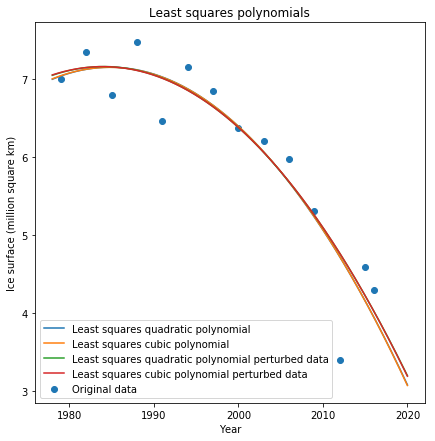

In [138]:
# Plot both fittings 
plt.figure(figsize=(7,7))
plt.title("Least squares polynomials")
plt.ylabel("Ice surface (million square km)")
plt.xlabel("Year")

plt.plot(time_steps, yQ, label='Least squares quadratic polynomial')
plt.plot(time_steps, yC, label='Least squares cubic polynomial')
plt.scatter(years, ice_areas, label='Original data')

plt.plot(time_steps, pyQ, label='Least squares quadratic polynomial perturbed data')
plt.plot(time_steps, pyC, label='Least squares cubic polynomial perturbed data')

plt.legend()
plt.show()

In [130]:
y_q1984 = quadratic_polynomial(qp, 1984)
y_c1984 = cubic_polynomial(cp, 1984)

y_q2016 = quadratic_polynomial(qp, 2016)
y_c2016 = cubic_polynomial(cp, 2016)

y_q2017 = quadratic_polynomial(qp, 2017)
y_c2017 = cubic_polynomial(cp, 2017)

y_q2018 = quadratic_polynomial(qp, 2018)
y_c2018 = cubic_polynomial(cp, 2018)

py_q1984 = quadratic_polynomial(pqp, 1984)
py_c1984 = cubic_polynomial(pcp, 1984)

py_q2016 = quadratic_polynomial(pqp, 2016)
py_c2016 = cubic_polynomial(pcp, 2016)

py_q2017 = quadratic_polynomial(pqp, 2017)
py_c2017 = cubic_polynomial(pcp, 2017)

py_q2018 = quadratic_polynomial(pqp, 2018)
py_c2018 = cubic_polynomial(pcp, 2018)

print("Actual dataset")
print('Predictions for t = 1984: ', 'quadratic: ', y_q1984, 'cubic: ', y_c1984)
print('Predictions for t = 2016: ', 'quadratic: ', y_q2016, 'cubic: ', y_c2016)
print('Predictions for t = 2017: ', 'quadratic: ', y_q2017, 'cubic: ', y_c2017)
print('Predictions for t = 2018: ', 'quadratic: ', y_q2018, 'cubic: ', y_c2018)

print("\nPerturbed dataset")
print('Predictions for t = 1984: ', 'quadratic: ', py_q1984, 'cubic: ', py_c1984)
print('Predictions for t = 2016: ', 'quadratic: ', py_q2016, 'cubic: ', py_c2016)
print('Predictions for t = 2017: ', 'quadratic: ', py_q2017, 'cubic: ', py_c2017)
print('Predictions for t = 2018: ', 'quadratic: ', py_q2018, 'cubic: ', py_c2018)

Actual dataset
Predictions for t = 1984:  quadratic:  7.148930426077641 cubic:  7.147829675454364
Predictions for t = 2016:  quadratic:  3.956849248670551 cubic:  3.9546376036327504
Predictions for t = 2017:  quadratic:  3.7485253701925103 cubic:  3.74507238724475
Predictions for t = 2018:  quadratic:  3.533621410399064 cubic:  3.5287435386875816

Perturbed dataset
Predictions for t = 1984:  quadratic:  7.160096975932902 cubic:  7.159202252379913
Predictions for t = 2016:  quadratic:  4.033709657820509 cubic:  4.032059590264765
Predictions for t = 2017:  quadratic:  3.834889350897356 cubic:  3.832168071479685
Predictions for t = 2018:  quadratic:  3.6299405165045755 cubic:  3.625981851391628


#### Discussion of exercise 5
The same perturbed data set as in exercise 3 is used.

After plotting in the same figure, we see that the cubic and quadratic least squares fits are almost the same. In the table, we can also see that they give almost the same predictions for the datapoints and are way less sensitive to the changes in the data 

__NB:__ Again, the predictions will change if the cells run again (but less, because the LS polynomials are less sensitive to the changes in the input data)

__TODO: Discuss why we're leaving one of those out from now?__

p = perturbed data set <br/>
LS = Least Squares

\begin{array}{|c|c|c|c|}
\hline Year & \text{Actual Data} & \text{Interpolation basis (c)} & \text{Interpolation basis (c) - p} & \text{Quadratic LS} & \text{Cubic LS}  & \text{Quadratic LS - p} & \text{Cubic LS - p}\\\hline
  1984 & 6.8 & 5.114 & 5.463 & 7.149 & 7.148 & 7.160 & 7.159 \\\hline
  2016 & 4.3 & 4.300 & 3.338 & 3.957 & 3.955 & 4.034 & 4.032 \\\hline
  2017 & 4.6 & -0.138 & 12.380 & 3.749 & 3.745 & 3.835 & 3.832 \\\hline
  2018 & 4.8 & -12.532 & 64.484 & 3.534 & 3.529 & 3.630 & 3.626 \\\hline
\end{array}



## Exercise 6

Fitting a function using linear least squares can be sensitive to "outliers" in the data. As an example, create a single outlier by changing the data point for $t=2009$ from $s=5.31$ to $s=7.31$. Repeat the linear least squares fitting procedure. Discuss your results.

In [48]:
p_years = np.array([1979, 1982, 1985, 1988, 1991, 1994, 1997, 2000, 2003, 2006, 2009, 2012, 2015, 2016], dtype=np.float64)
ice_p_areas = np.array([7.00, 7.34, 6.79, 7.47, 6.46, 7.15, 6.85, 6.37, 6.21, 5.97, 7.31, 3.40, 4.59, 4.30], dtype=np.float64)

In [131]:
# Quadratic function fitting

# Find the parameters
oqp = np.linalg.lstsq(Qm, ice_p_areas, rcond=None)[0]
ocp = np.linalg.lstsq(Cm, ice_p_areas, rcond=None)[0]

# Calculate the lines
oyQ = quadratic_polynomial(oqp, time_steps)
oyC = cubic_polynomial(ocp, time_steps)

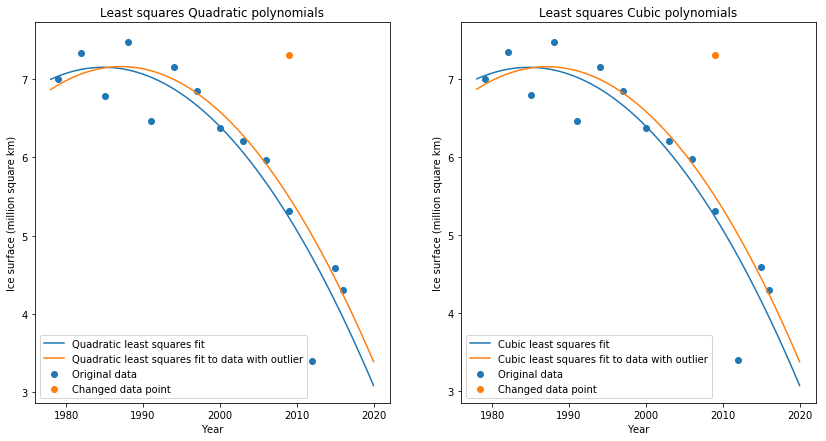

In [134]:
# Plot all four fittings

plt.figure(figsize=(14,7))

plt.subplot(1, 2, 1)
plt.plot(time_steps, yQ, label='Quadratic least squares fit')
plt.plot(time_steps, oyQ, label='Quadratic least squares fit to data with outlier')
plt.scatter(p_years, ice_areas, label='Original data')
plt.scatter(p_years[10], ice_p_areas[10], label='Changed data point')
plt.title("Least squares Quadratic polynomials")
plt.ylabel("Ice surface (million square km)")
plt.xlabel("Year")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(time_steps, yC, label='Cubic least squares fit')
plt.plot(time_steps, oyC, label='Cubic least squares fit to data with outlier')

plt.title("Least squares Cubic polynomials")
plt.ylabel("Ice surface (million square km)")
plt.xlabel("Year")
plt.scatter(p_years, ice_areas, label='Original data')
plt.scatter(p_years[10], ice_p_areas[10], label='Changed data point')

plt.legend()

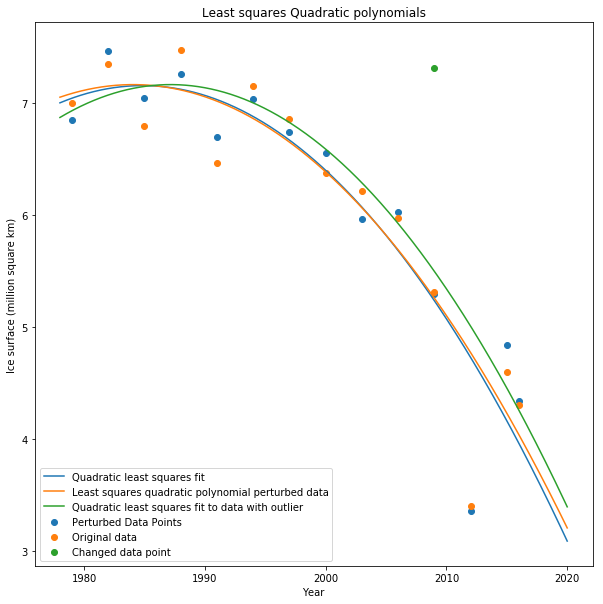

In [139]:
plt.figure(figsize=(10,10))
plt.plot(time_steps, yQ, label='Quadratic least squares fit')
plt.plot(time_steps, pyQ, label='Least squares quadratic polynomial perturbed data')
plt.plot(time_steps, oyQ, label='Quadratic least squares fit to data with outlier')
plt.scatter(years, perturbed_ice_areas, label='Perturbed Data Points')
plt.scatter(p_years, ice_areas, label='Original data')
plt.scatter(p_years[10], ice_p_areas[10], label='Changed data point')
plt.title("Least squares Quadratic polynomials")
plt.ylabel("Ice surface (million square km)")
plt.xlabel("Year")
plt.legend()

# TODO: IS THIS A BUG? THE FIT WITH OUTLIER/PERTUBED DATA SEEMS THE SAME

In [133]:
oy_q1984 = quadratic_polynomial(oqp, 1984)
oy_c1984 = cubic_polynomial(ocp, 1984)

oy_q2016 = quadratic_polynomial(oqp, 2016)
oy_c2016 = cubic_polynomial(ocp, 2016)

oy_q2017 = quadratic_polynomial(oqp, 2017)
oy_c2017 = cubic_polynomial(ocp, 2017)

oy_q2018 = quadratic_polynomial(oqp, 2018)
oy_c2018 = cubic_polynomial(ocp, 2018)

print('Predictions from dataset with an outlier')
print('Predictions for t = 1984: ', 'quadratic: ', oy_q1984, 'cubic: ', oy_c1984)
print('Predictions for t = 2016: ', 'quadratic: ', oy_q2016, 'cubic: ', oy_c2016)
print('Predictions for t = 2017: ', 'quadratic: ', oy_q2017, 'cubic: ', oy_c2017)
print('Predictions for t = 2018: ', 'quadratic: ', oy_q2018, 'cubic: ', oy_c2018)

Predictions from dataset with an outlier
Predictions for t = 1984:  quadratic:  7.125264222615442 cubic:  7.123703681706843
Predictions for t = 2016:  quadratic:  4.2526022605270555 cubic:  4.249025089594738
Predictions for t = 2017:  quadratic:  4.047442577289985 cubic:  4.042291706601986
Predictions for t = 2018:  quadratic:  3.8352896215110377 cubic:  3.828355630153396


#### Discussion of exercise 6
Interpolation is done with basis (c) from exercise 2 <br/>
QLS = Quadratic Least Squares<br/> 
CLS = Cubic Least Squares<br/>
p = perturbed dataset <br/>
o = dataset with outlier

All the results from the different fitting methods can be seen in the following table. __TODO: CONCLUSION?__

\begin{array}{|c|c|c|c|c|c|}
\hline Year & \text{Actual Data} & \text{Interpolation} & \text{Interpolation - p} & \text{QLS} & \text{CLS}  & \text{QLS - p} & \text{CLS - p} & \text{QLS - o} & \text{CLS - o}\\\hline
  1984 & 6.8 & 5.114 & 5.116 & 7.149 & 7.148 & 7.125 & 7.123 & 7.125 & 7.124\\\hline
  2016 & 4.3 & 4.300 & 4.416 & 3.957 & 3.955 & 3.956 & 3.955 & 4.252 & 4.249 \\\hline
  2017 & 4.6 & -0.138 & 0.788 & 3.749 & 3.745 & 4.047 & 4.042 & 4.047 & 4.042 \\\hline
  2018 & 4.8 & -12.532 & -10.192 & 3.534 & 3.529 & 3.835 & 3.828 & 3.835 & 3.828\\\hline
\end{array}

## Exercise 7
There may be more suitable functions to fit to these data than a polynomial. For example, predictions using a polynomial may give negative values, which would be unphysical. Can you think of a suitable function, and fit it to the data? What predictions does it give? If the function is nonlinear in its parameters, fitting it by least squares will give a _nonlinear least squares_ problem (see section 6.6 in the book by Heath). 

In [157]:
from scipy import interpolate
from scipy import optimize
import scipy as sp
from scipy.optimize import leastsq 
from scipy.optimize import curve_fit
from math import *

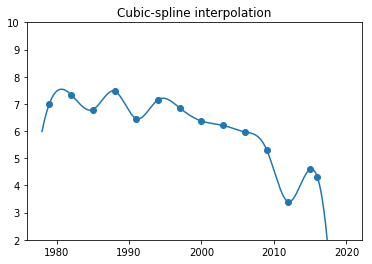

In [167]:
tck = sp.interpolate.splrep(years, ice_areas, s=0)
ynew = interpolate.splev(time_steps, tck, der=0)

plt.figure()
plt.plot(time_steps, ynew)
plt.ylim(2,10)
plt.title('Cubic-spline interpolation')
plt.scatter(p_years, ice_areas, label='Original data')
plt.show()

[2.51531842e+00 6.19933151e-02 1.25670300e+03 4.68638811e+00]


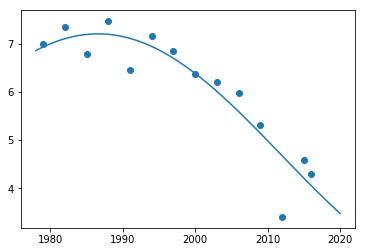

[ 2.51528156e+00  6.19939528e-02 -2.63604079e+02  4.68642660e+00]


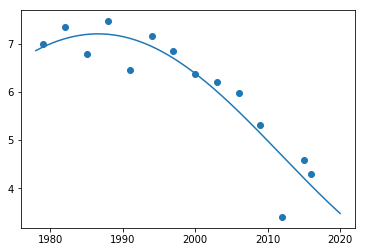

[2.51517749e+00 6.19958815e-02 1.05387184e+03 4.68653450e+00]


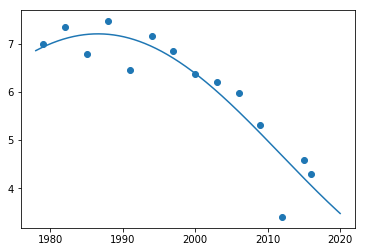

[-8.18891013e-01  3.05905006e-01 -7.80704649e+02  6.11463394e+00]


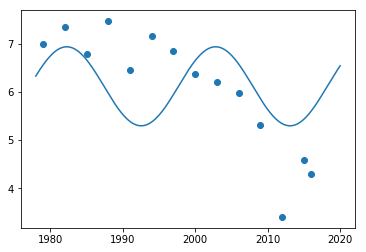

[ -0.81888078   0.30590024 -41.24638047   6.11463521]


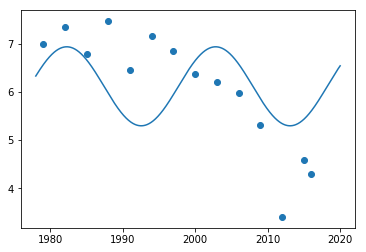

[-0.62517212  0.48163204 73.50071738  6.10770589]


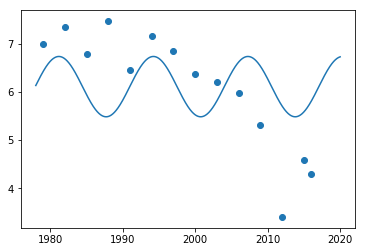

[ 0.31192533  0.97118891 56.84002284  6.10620357]


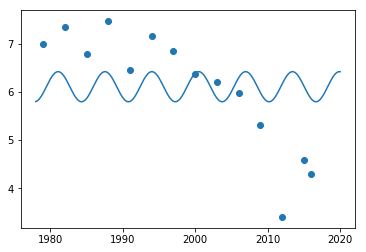

In [217]:
# fit a simple cosine function to the data
def cosine_function(x, a, b, c, d):
    return a * np.cos(b*(c + x)) + d

# With
# a = amplitude ~ 2
# 2pi/b = period ~ to find out
# c = horizontal move ~ 0?
# d = vertical move (equilibrium state) ~ 5


ps = [0, 0.05, 0.1, 0.2, 0.3, 0.5, 1]

for p in ps:
 
    params = optimize.curve_fit(cosine_function, years, ice_areas, p0=[2, p, 0, 5])[0]
    
    print(params)
    plt.scatter(years, ice_areas, label='Data')
    plt.plot(time_steps, cosine_function(time_steps, params[0], params[1], params[2], params[3]))
    plt.show()

In [ ]:
# fit a simple cosine function to the data
def log_function(coefficients, x):
    return coefficients[0] + np.log(coefficients[1] * x)

reversed_ice = ice_areas[::-1]
# With
# a = amplitude ~ 2
# 2pi/b = period ~ to find out
# c = horizontal move ~ 0?
# d = vertical move (equilibrium state) ~ 5
 
params = optimize.curve_fit(lambda t,a,b: a+b*np.log(t),  years,  reversed_ice)[0]
# params = optimize.curve_fit(log_function, years, reversed_ice, p0=[1, 0])[0]

plt.scatter(years, reversed_ice, label='Data')
y = [log_function(params, time_steps) for time_step in time_steps]
plt.plot(time_steps, y)
plt.show()

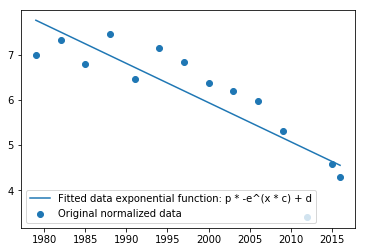

(array([-59551.84418156,  40475.57350533, -24164.01743377,   -149.03867253,
        -2024.8812    ]), array([[ 1.06048792e+16,  5.05149512e+16,  8.80555727e+14,
        -3.00474329e+14,  8.31765244e+13],
       [ 7.78795970e+16,  7.83243618e+15, -2.16749175e+15,
         1.67967092e+14, -9.15474731e+13],
       [ 3.92274982e+15, -1.56369973e+15,  3.26895819e+14,
         1.37378820e+13,  3.08709831e+13],
       [-5.16713957e+14,  9.44339301e+13,  1.03342791e+13,
        -1.95434413e+12,  2.78086723e+11],
       [ 3.30696933e+14, -7.22211692e+13,  2.75580777e+13,
         7.90494065e+11,  2.60247194e+12]]))


In [54]:
# fitting function: p * -e^(x * c) + d, want multiple parameters to fit
def pval(x, a, b, c, d, e):
    return a*(np.exp((x-b)/c)/(np.exp((x-b)/c)+d))+e
    # this is complete bullshit #return cos(t*x)*np.exp(-x*a)+b

# initial guess for the parameters: don't really matter
p_0 = (-1,2010,18,10,10)

p0 = array([p_0])

# Curve fit calls leastsq under the hood and uses Levenberg-Marquardt
plsq = curve_fit(pval, years, ice_areas, p0=p_0, maxfev=10000000, method='lm')#, )

# Create the actual line
vals = plsq[0][0]*(np.exp((years-plsq[0][1])/plsq[0][2])/(np.exp((years-plsq[0][1])/plsq[0][2])+plsq[0][3]))+plsq[0][4]

plt.scatter(years, ice_areas, label='Original normalized data')
plt.plot(years, vals, label='Fitted data exponential function: p * -e^(x * c) + d')
plt.legend()
plt.show()

print(plsq)

c:\python37\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


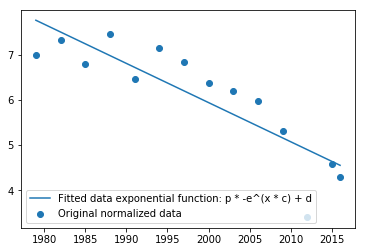

(array([-9.68857969e+03, -9.13683611e-06, -9.50719801e+03]), array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]]))


In [55]:
# fitting function: p * -e^(x * c) + d, want multiple parameters to fit
def pval(x, p, c, d):
    return p*-np.exp(c*x)+d
    #return c + p*np.log(x)
    #return c*np.cos(p*x) + 1

# initial guess for the parameters: don't really matter
p_0 = (1, 1e-6, 1)

p0 = array([p_0])

# Curve fit calls leastsq under the hood and uses Levenberg-Marquardt
plsq = curve_fit(pval, years, ice_areas, p0=p_0, maxfev=10000000)#, method='lm')

# Create the actual line
vals = plsq[0][0]*-np.exp(plsq[0][1]*years)+plsq[0][2]
#vals = plsq[0][0] + plsq[0][1]*np.log(years)
#vals = plsq[0][1]* np.cos(plsq[0][1]*years) + 1

plt.scatter(years, ice_areas, label='Original normalized data')
plt.plot(years, vals, label='Fitted data exponential function: p * -e^(x * c) + d')
plt.legend()
plt.show()

print(plsq)